# **FEATURE SCALING**

### **Why do we need scaling?**
> * **Machine learning algorithm just sees number — if there is a vast difference in the range say few ranging in thousands and few ranging in the tens, and it makes the underlying assumption that higher ranging numbers have superiority of some sort. So these more significant number starts playing a more decisive role while training the model.**
* **Another reason why feature scaling is applied is that few algorithms like Neural network gradient descent converge much faster with feature scaling than without it.**
* **One more reason is saturation, like in the case of sigmoid activation in Neural Network, scaling would help not to saturate too fast.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Types of feature scaling**
> * Standardization 
* Normalization

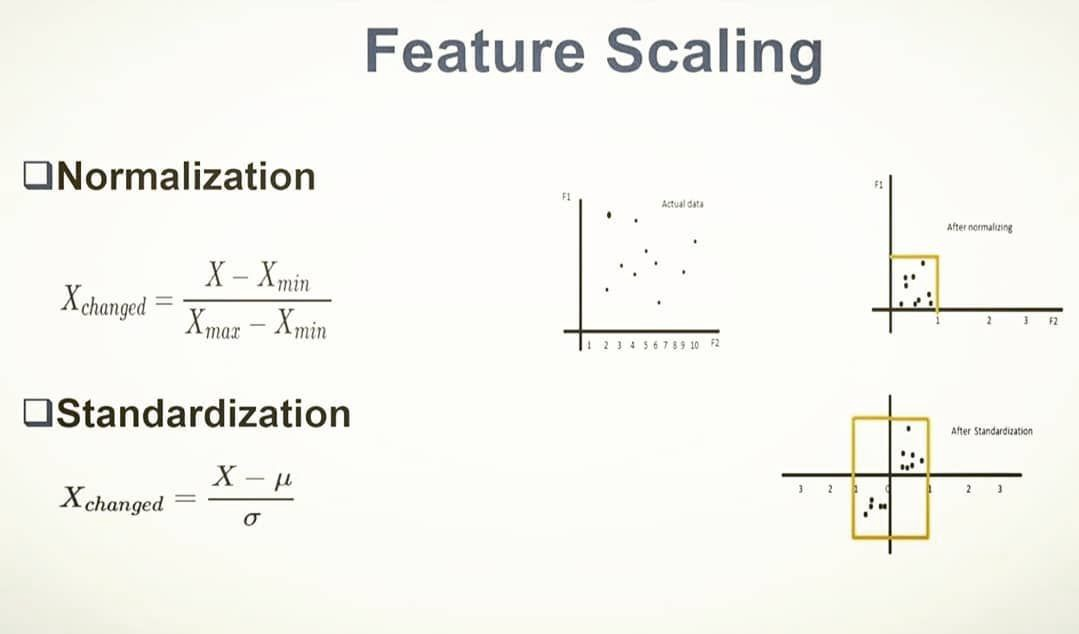

### **Load dataset**

In [5]:
import sklearn
from sklearn import datasets

In [6]:
data = datasets.fetch_california_housing()

In [11]:
df = pd.DataFrame(data.data,columns=data.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [21]:
df = df[['MedInc','Population']]

df['target'] = data.target
df.head()

,MedInc,Population,target
0,8.3252,322.0,4.526
1,8.3014,2401.0,3.585
2,7.2574,496.0,3.521
3,5.6431,558.0,3.413
4,3.8462,565.0,3.422


### **Train test split**

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(df.drop('target',axis=1),df['target'],test_size=0.3,random_state=42)

In [23]:
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((14448, 2), (14448,), (6192, 2), (6192,))

# **Standardization**

## **StandardScaler**

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit only on train data
scaler.fit(X_train)

# Transform both train and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
scaler.mean_

array([   3.87689155, 1427.92732558])

In [29]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [34]:
np.round(X_train.describe())

,MedInc,Population
count,14448.0,14448.0
mean,4.0,1428.0
std,2.0,1140.0
min,0.0,3.0
25%,3.0,791.0
50%,4.0,1168.0
75%,5.0,1727.0
max,15.0,35682.0


In [33]:
np.round(X_train_scaled.describe())

,MedInc,Population
count,14448.0,14448.0
mean,-0.0,0.0
std,1.0,1.0
min,-2.0,-1.0
25%,-1.0,-1.0
50%,-0.0,-0.0
75%,0.0,0.0
max,6.0,30.0


### **Effect of scaling on data**

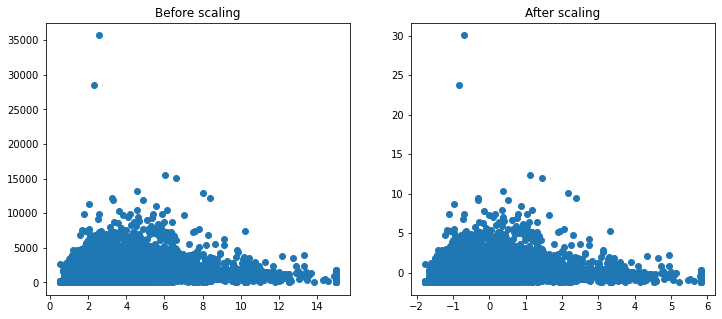

In [37]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(X_train['MedInc'],X_train['Population'])
ax2.scatter(X_train_scaled['MedInc'],X_train_scaled['Population'])

ax1.set_title("Before scaling")
ax2.set_title("After scaling")

plt.show()

### **Comparison of PDF before and after scaling**

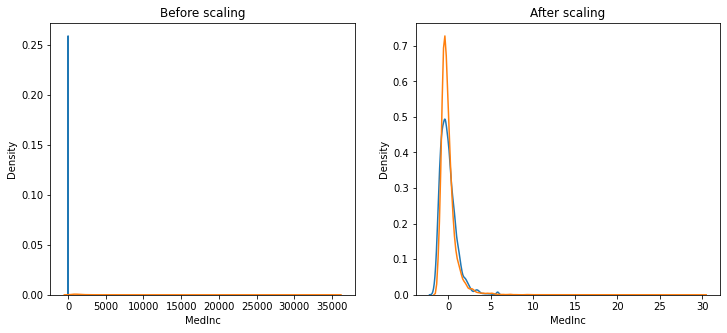

In [38]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

sns.kdeplot(X_train['MedInc'],ax=ax1)
sns.kdeplot(X_train['Population'],ax=ax1)

sns.kdeplot(X_train_scaled['MedInc'],ax=ax2)
sns.kdeplot(X_train_scaled['Population'],ax=ax2)

ax1.set_title("Before scaling")
ax2.set_title("After scaling")

plt.show()

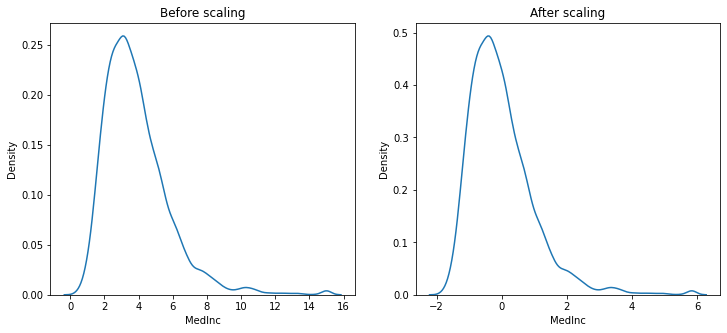

In [39]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

sns.kdeplot(X_train['MedInc'],ax=ax1)

sns.kdeplot(X_train_scaled['MedInc'],ax=ax2)

ax1.set_title("Before scaling")
ax2.set_title("After scaling")

plt.show()

* **Distribution remains the same, only the scale changes**
* **There is no impact on the effect of outliers on data after scaling, they still need to be handled**

# **Normalization**
> **Normalization is a technique often applied as a part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting the differences in the range of values or losing information**
* MinMax scaling
* Mean normalization
* Max absolute scaling
* Robust scaling

### **Min Max Scaling**

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
scaler = MinMaxScaler()

In [42]:
# Fit only on train data
scaler.fit(X_train)

# Transform both train and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
np.round(X_train.describe())

,MedInc,Population
count,14448.0,14448.0
mean,4.0,1428.0
std,2.0,1140.0
min,0.0,3.0
25%,3.0,791.0
50%,4.0,1168.0
75%,5.0,1727.0
max,15.0,35682.0


In [45]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [47]:
X_train_scaled.describe()

,MedInc,Population
count,14448.000000,14448.000000
mean,0.232893,0.039937
std,0.131371,0.031958
min,0.000000,0.000000
25%,0.142572,0.022086
50%,0.209597,0.032652
75%,0.293663,0.048320
max,1.000000,1.000000


### **Effect of normalization on data**

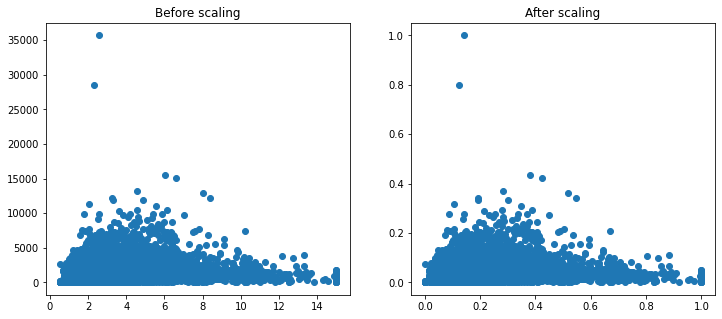

In [48]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(X_train['MedInc'],X_train['Population'])
ax2.scatter(X_train_scaled['MedInc'],X_train_scaled['Population'])

ax1.set_title("Before scaling")
ax2.set_title("After scaling")

plt.show()

### **Effect on PDF after normalization**

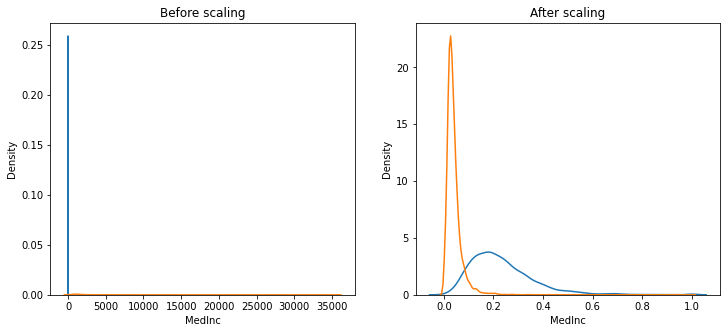

In [49]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

sns.kdeplot(X_train['MedInc'],ax=ax1)
sns.kdeplot(X_train['Population'],ax=ax1)

sns.kdeplot(X_train_scaled['MedInc'],ax=ax2)
sns.kdeplot(X_train_scaled['Population'],ax=ax2)

ax1.set_title("Before scaling")
ax2.set_title("After scaling")

plt.show()

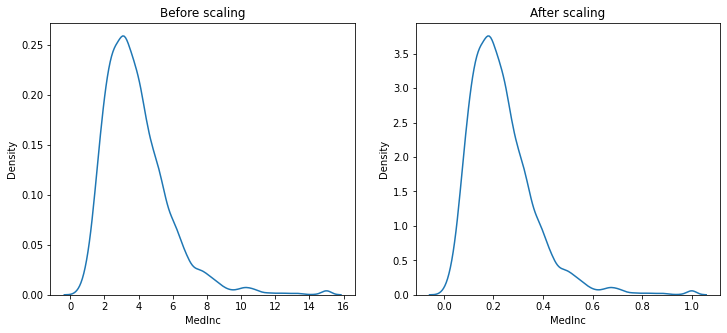

In [50]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

sns.kdeplot(X_train['MedInc'],ax=ax1)

sns.kdeplot(X_train_scaled['MedInc'],ax=ax2)

ax1.set_title("Before scaling")
ax2.set_title("After scaling")

plt.show()

### **Max Absolute Scaling**

(Mostly used in case of sparse matrices)

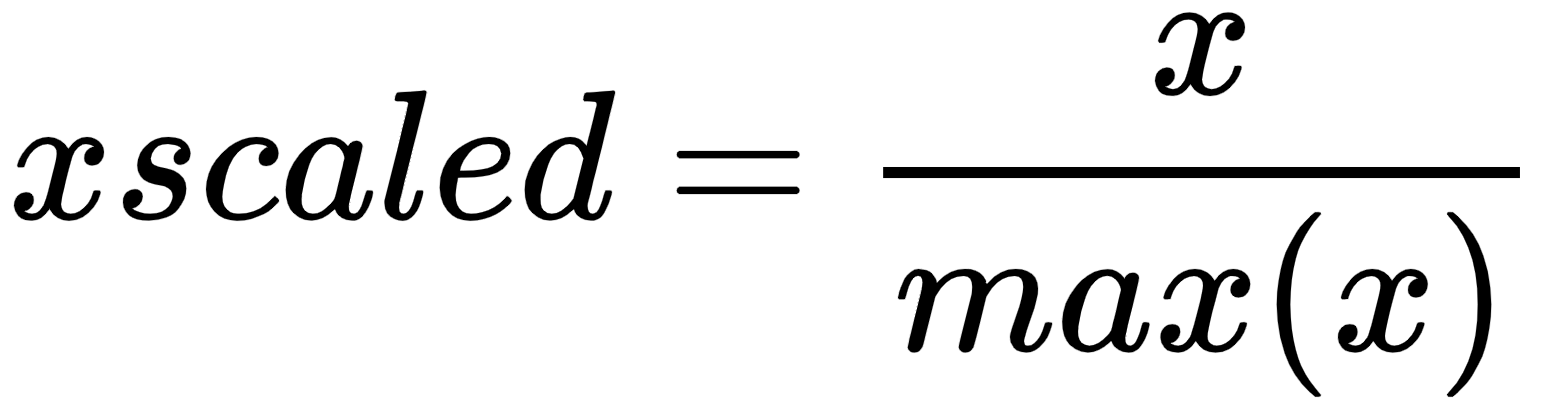

In [51]:
from sklearn.preprocessing import MaxAbsScaler

In [52]:
scaler = MaxAbsScaler()

In [63]:
# Fit only on train data
scaler.fit(X_train)

# Transform both train and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [64]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

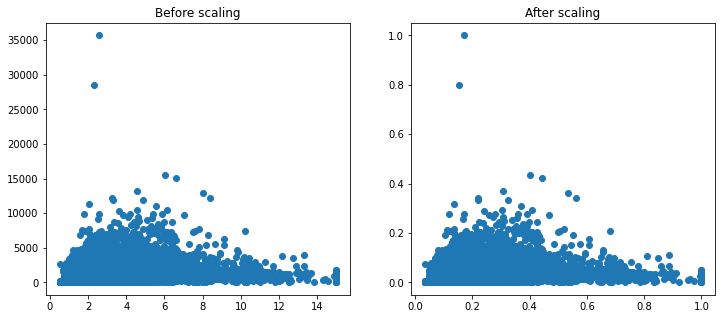

In [65]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(X_train['MedInc'],X_train['Population'])
ax2.scatter(X_train_scaled['MedInc'],X_train_scaled['Population'])

ax1.set_title("Before scaling")
ax2.set_title("After scaling")

plt.show()

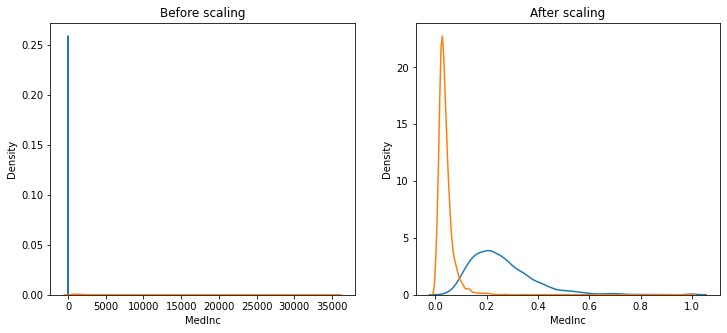

In [66]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

sns.kdeplot(X_train['MedInc'],ax=ax1)
sns.kdeplot(X_train['Population'],ax=ax1)

sns.kdeplot(X_train_scaled['MedInc'],ax=ax2)
sns.kdeplot(X_train_scaled['Population'],ax=ax2)

ax1.set_title("Before scaling")
ax2.set_title("After scaling")

plt.show()

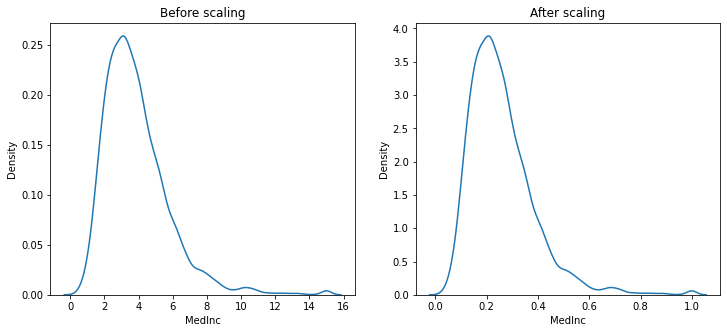

In [67]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

sns.kdeplot(X_train['MedInc'],ax=ax1)

sns.kdeplot(X_train_scaled['MedInc'],ax=ax2)

ax1.set_title("Before scaling")
ax2.set_title("After scaling")

plt.show()

### **Robust Scaler**
(Robust to outliers)

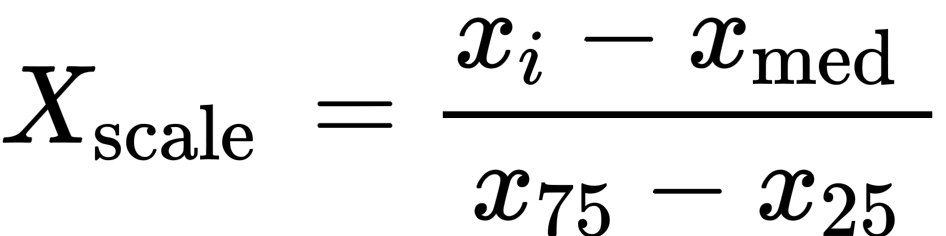

In [68]:
from sklearn.preprocessing import RobustScaler

In [69]:
scaler = RobustScaler()

In [70]:
# Fit only on train data
scaler.fit(X_train)

# Transform both train and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [71]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

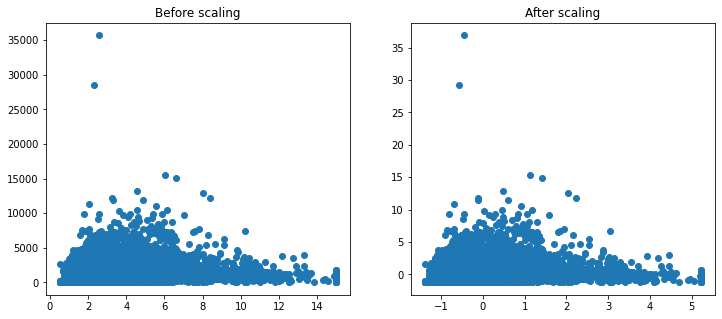

In [72]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(X_train['MedInc'],X_train['Population'])
ax2.scatter(X_train_scaled['MedInc'],X_train_scaled['Population'])

ax1.set_title("Before scaling")
ax2.set_title("After scaling")

plt.show()

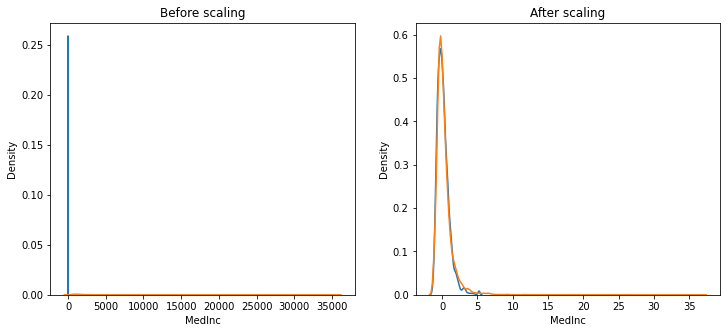

In [73]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

sns.kdeplot(X_train['MedInc'],ax=ax1)
sns.kdeplot(X_train['Population'],ax=ax1)

sns.kdeplot(X_train_scaled['MedInc'],ax=ax2)
sns.kdeplot(X_train_scaled['Population'],ax=ax2)

ax1.set_title("Before scaling")
ax2.set_title("After scaling")

plt.show()

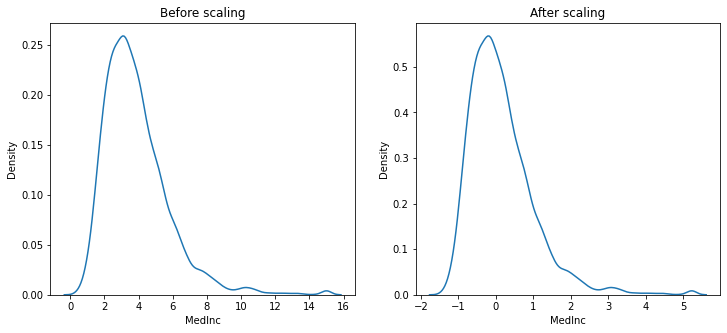

In [75]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

sns.kdeplot(X_train['MedInc'],ax=ax1)

sns.kdeplot(X_train_scaled['MedInc'],ax=ax2)

ax1.set_title("Before scaling")
ax2.set_title("After scaling")

plt.show()